<a href="https://colab.research.google.com/github/zacharski/ml-class/blob/master/VolcanoesRevisited.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Volcanoes Revisted

### Errors were made in the previous notebook ...

This is based off of Sally's code.
### First load the data

In [19]:
import pandas as pd
volcanoes_train_images = pd.read_csv("http://zacharski.org/files/courses/cs419/volcanoes_train_images.csv", header=None)
volcanoes_train_labels = pd.read_csv("http://zacharski.org/files/courses/cs419/volcanoes_train_labels.csv")
volcanoes_test_images = pd.read_csv("http://zacharski.org/files/courses/cs419/volcanoes_test_images.csv", header=None)
volcanoes_test_labels = pd.read_csv("http://zacharski.org/files/courses/cs419/volcanoes_test_labels.csv")


### Display a few images

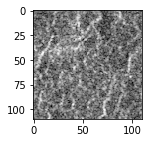

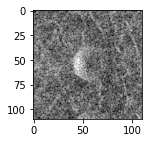

In [20]:
import matplotlib.pyplot as plt
def viewImage(x):
    plt.figure(figsize=(2,2))
    plt.imshow(x.values.reshape([110,110]), interpolation='nearest', cmap='gray')
    plt.show()
viewImage(volcanoes_test_images.iloc[1])
viewImage(volcanoes_test_images.iloc[2])


volcanoes_train_images = volcanoes_train_images.astype('float32') / 255
volcanoes_test_images = volcanoes_test_images.to_numpy()
volcanoes_test_images = volcanoes_test_images.astype('float32') / 255


#### now let's check the lengths and see an example of a label

In [23]:
print(len(volcanoes_train_labels))
print(len(volcanoes_train_images))
print(volcanoes_train_labels.iloc[0])

7000
7000
Volcano?             1.00
Type                 3.00
Radius              17.46
Number Volcanoes     1.00
Name: 0, dtype: float64


As you can see the label contains:

* **Volcano?** a binary value representing whether a volcano is present or not
* **Type** if a volcano is present how confident was the coder: Type: 1= definitely a volcano,2 =probably, 3= possibly, 4= only a pit is visible
* **Radius** the radius of the volcano in pixels
* **Number of Volcanos**



### let's just get the Volvano? column


In [33]:
volcano_train_y = volcanoes_train_labels['Volcano?']
volcano_test_y = volcanoes_test_labels['Volcano?']
volcano_test_y

0       0
1       0
2       1
3       0
4       1
       ..
2729    0
2730    0
2731    0
2732    0
2733    0
Name: Volcano?, Length: 2734, dtype: int64

That looks reasonable. 

### Now to Building a Network

First, the imports

In [27]:
import keras
from keras import models
from keras import layers
keras.__version__

'2.4.3'

### Construct a neural network. 
Since the image is 110 by 110 and it is already flattened, the input shape will be 110 * 110  or 12,100: 

In [28]:
network_v = models.Sequential()
network_v.add(layers.Dense(512, activation='relu', input_shape=(110 * 110,)))

When we were working with digit recognition and clothing recognition the output could be one of ten categories and the labels were an array of size 10. That is why we had 10 in

```
network2.add(layers.Dense(10, activation='softmax'))
```

In this volcano case the label is just one value (either a 1 or 0). This is called binary classification. So the output layer would look like:

In [29]:
network_v.add(layers.Dense(1, activation='sigmoid'))

### Compiling the model
Again, in the digits and clothes systems there were 10 possible labels or categories so we used:

```
loss='categorical_crossentropy'
```
The volcano task is binary classification so we use

```
loss='binary_crossentropy'
```


In [30]:
network_v.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['accuracy'])


### Fit the data
Let's use `validation_split` which will allow us to see if we are overfitting...

In [35]:
history = network_v.fit(
          volcanoes_train_images, volcano_train_y,
          steps_per_epoch=100,
          epochs=30,
          validation_split=.2)

Epoch 1/30
100/100 [==============================] - 8s 85ms/step - loss: 1.0159 - accuracy: 0.7837 - val_loss: 3.1852 - val_accuracy: 0.1821
Epoch 2/30
100/100 [==============================] - 8s 80ms/step - loss: 0.7915 - accuracy: 0.7973 - val_loss: 0.4808 - val_accuracy: 0.8514
Epoch 3/30
100/100 [==============================] - 8s 80ms/step - loss: 0.5732 - accuracy: 0.8120 - val_loss: 0.4883 - val_accuracy: 0.8521
Epoch 4/30
100/100 [==============================] - 8s 80ms/step - loss: 0.5800 - accuracy: 0.8270 - val_loss: 0.6512 - val_accuracy: 0.8514
Epoch 5/30
100/100 [==============================] - 8s 80ms/step - loss: 0.5008 - accuracy: 0.8229 - val_loss: 0.4551 - val_accuracy: 0.8493
Epoch 6/30
100/100 [==============================] - 8s 81ms/step - loss: 0.4589 - accuracy: 0.8373 - val_loss: 0.3922 - val_accuracy: 0.8493
Epoch 7/30
100/100 [==============================] - 8s 80ms/step - loss: 0.4481 - accuracy: 0.8498 - val_loss: 0.4124 - val_accuracy: 0.8500